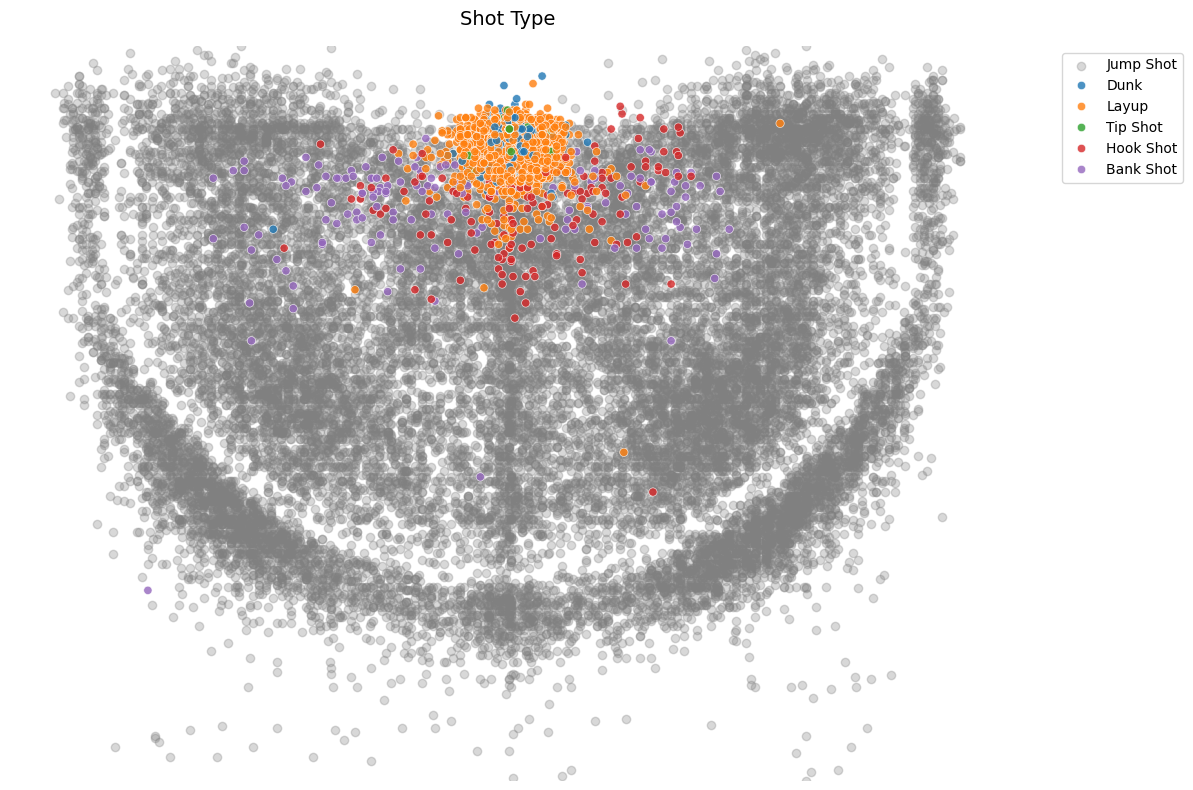

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set figure size
plt.figure(figsize=(12, 8))

shots = pd.read_csv('/content/data.csv')
# Plot jump shots with lower alpha
jump_shots = shots[shots['combined_shot_type'] == 'Jump Shot']
plt.scatter(jump_shots['lon'], jump_shots['lat'],
           color='grey', alpha=0.3, label='Jump Shot')

# Plot other shots with higher alpha
other_shots = shots[shots['combined_shot_type'] != 'Jump Shot']
sns.scatterplot(data=other_shots, x='lon', y='lat',
                hue='combined_shot_type', alpha=0.8)

# Customize the plot
plt.title("Shot Type", pad=15, fontsize=14)
plt.ylim(33.7, 34.0883)

# Remove axes and grid for void theme
plt.axis('off')

# Adjust legend
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent legend cutoff
plt.tight_layout()

plt.show()

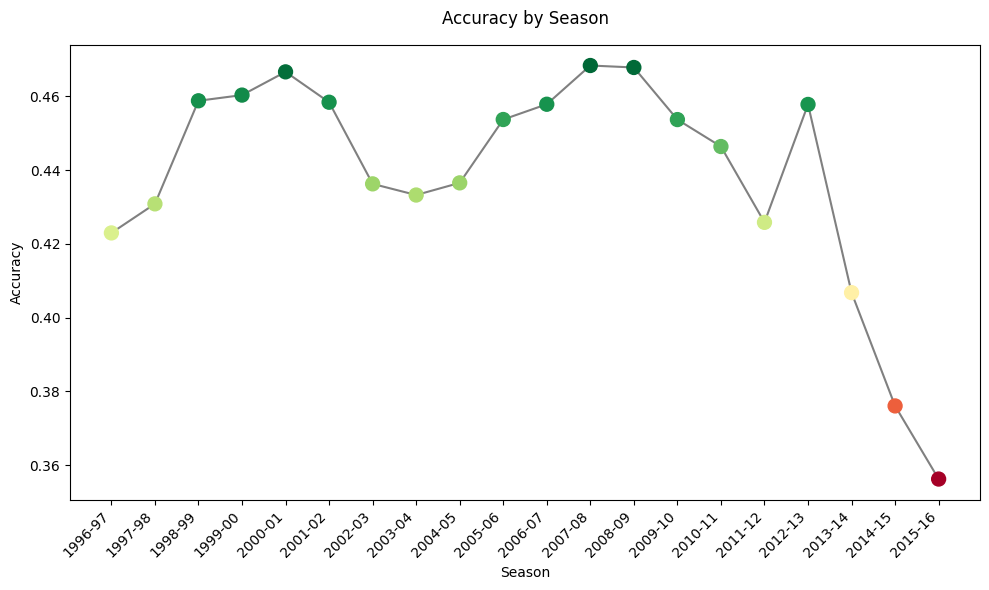

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate accuracy by season
accuracy_by_season = shots.groupby('season')['shot_made_flag'].mean().reset_index()

# Create figure
plt.figure(figsize=(10, 6))

# Create colormap
colors = accuracy_by_season['shot_made_flag'].values
norm = plt.Normalize(colors.min(), colors.max())
cmap = plt.cm.RdYlGn  # Red to Green colormap

# Plot line and points
plt.plot(accuracy_by_season['season'], accuracy_by_season['shot_made_flag'],
         color='gray', zorder=1)
plt.scatter(accuracy_by_season['season'], accuracy_by_season['shot_made_flag'],
           c=colors, cmap=cmap, s=100, zorder=2)

# Customize plot
plt.title("Accuracy by Season", pad=15)
plt.xlabel("Season")
plt.ylabel("Accuracy")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

plt.show()

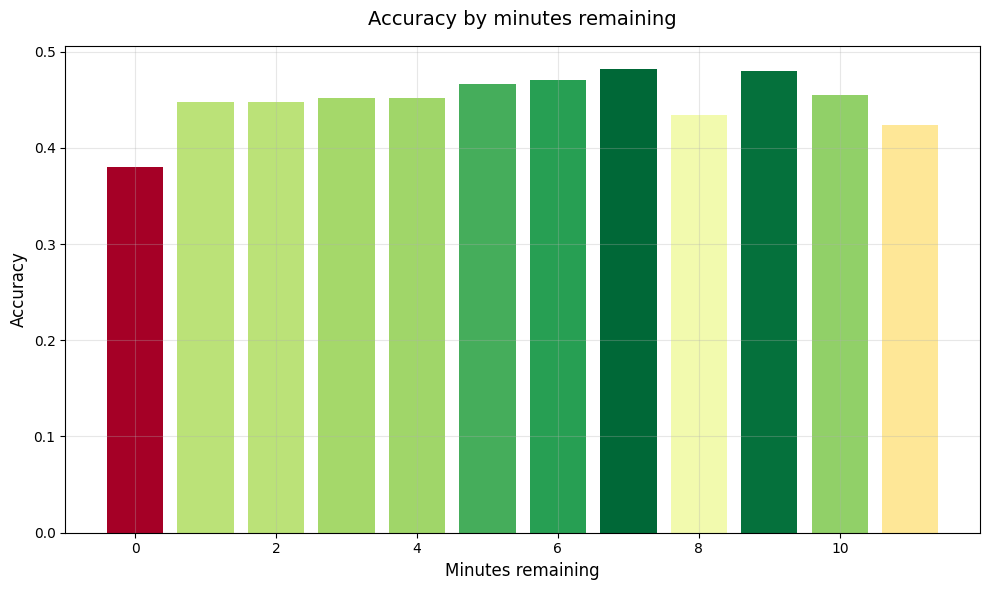

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate accuracy by minutes remaining
accuracy_by_minute = shots.groupby('minutes_remaining')['shot_made_flag'].mean().reset_index()

# Create figure
plt.figure(figsize=(10, 6))

# Create color gradient based on accuracy values
cmap = plt.cm.RdYlGn  # Red to Green colormap
norm = plt.Normalize(accuracy_by_minute['shot_made_flag'].min(),
                    accuracy_by_minute['shot_made_flag'].max())
colors = cmap(norm(accuracy_by_minute['shot_made_flag']))

# Create bar plot
bars = plt.bar(accuracy_by_minute['minutes_remaining'],
               accuracy_by_minute['shot_made_flag'],
               color=colors)

# Customize plot
plt.title("Accuracy by minutes remaining", pad=15, fontsize=14)
plt.xlabel("Minutes remaining", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Set background style
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

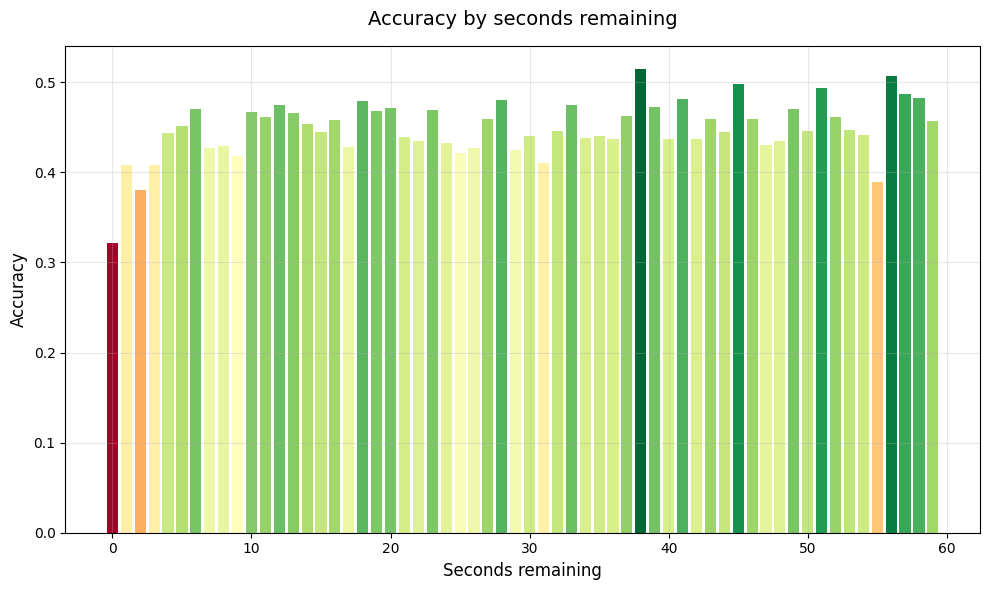

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate accuracy by seconds remaining
accuracy_by_second = shots.groupby('seconds_remaining')['shot_made_flag'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Create color gradient
cmap = plt.cm.RdYlGn
norm = plt.Normalize(accuracy_by_second['shot_made_flag'].min(),
                    accuracy_by_second['shot_made_flag'].max())
colors = cmap(norm(accuracy_by_second['shot_made_flag']))

# Create bar plot
plt.bar(accuracy_by_second['seconds_remaining'],
        accuracy_by_second['shot_made_flag'],
        color=colors)

plt.title("Accuracy by seconds remaining", pad=15, fontsize=14)
plt.xlabel("Seconds remaining", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

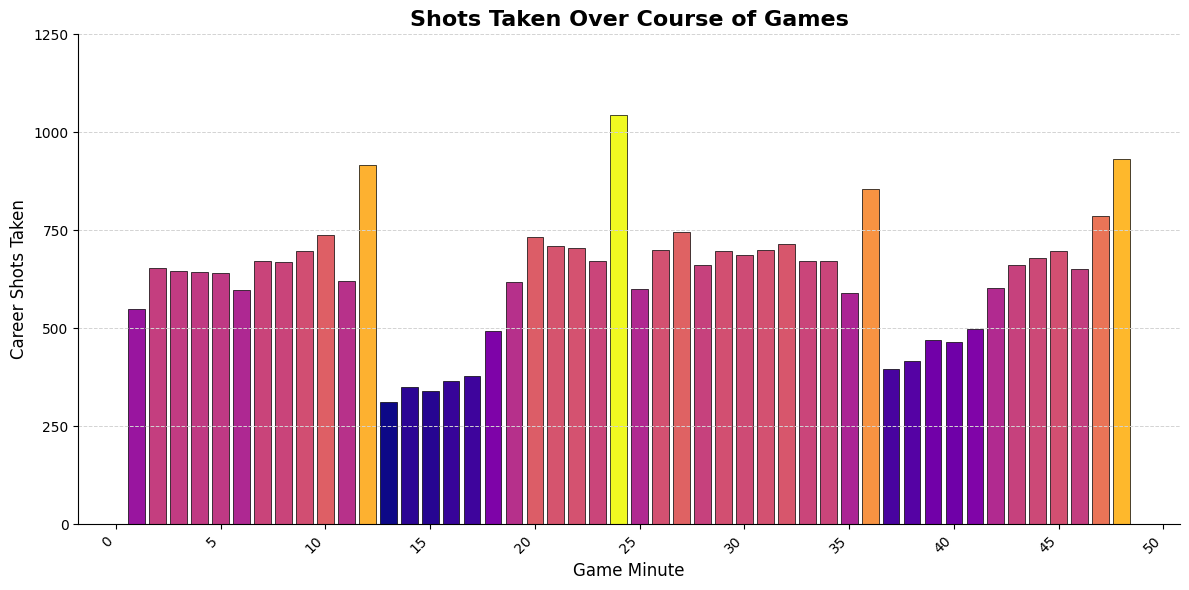

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors

# Read data
kobe = pd.read_csv('/content/data.csv')

# Calculate game_minute for each shot
def calculate_game_minute(row):
    if row['period'] == 1:
        return 12 - row['minutes_remaining']
    elif row['period'] == 2:
        return 24 - row['minutes_remaining']
    elif row['period'] == 3:
        return 36 - row['minutes_remaining']
    elif row['period'] == 4:
        return 48 - row['minutes_remaining']
    elif row['period'] == 5:
        return 60 - row['minutes_remaining']
    elif row['period'] == 6:
        return 72 - row['minutes_remaining']
    elif row['period'] == 7:
        return 84 - row['minutes_remaining']
    else:
        return None

kobe['game_minute'] = kobe.apply(calculate_game_minute, axis=1)

# Filter shots within the first 48 minutes and count shots by game_minute
shots_by_minute = kobe[kobe['game_minute'] <= 48].groupby('game_minute', as_index=False).size()
shots_by_minute.rename(columns={'size': 'shot_count'}, inplace=True)

# Normalize shot counts for color mapping
norm = colors.Normalize(vmin=min(shots_by_minute['shot_count']), vmax=max(shots_by_minute['shot_count']))
cmap = cm.plasma

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the shots over game minutes with color gradient
bars = ax.bar(
    shots_by_minute['game_minute'],
    shots_by_minute['shot_count'],
    color=cmap(norm(shots_by_minute['shot_count'])),
    edgecolor="black",  # Add borders to bars
    linewidth=0.5
)

# Add titles and labels
ax.set_title("Shots Taken Over Course of Games", fontsize=16, fontweight='bold')
ax.set_xlabel("Game Minute", fontsize=12)
ax.set_ylabel("Career Shots Taken", fontsize=12)

# Customize axis ticks
ax.set_xticks(range(0, 55, 5))
ax.set_xticklabels(range(0, 55, 5), fontsize=10, rotation=45, ha='right')
ax.set_yticks(range(0, int(shots_by_minute['shot_count'].max()) + 250, 250))
ax.set_yticklabels(range(0, int(shots_by_minute['shot_count'].max()) + 250, 250), fontsize=10)

# Customize gridlines
ax.grid(axis='y', linestyle='--', linewidth=0.7, color='#d3d3d3')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout for better readability
plt.tight_layout()
plt.show


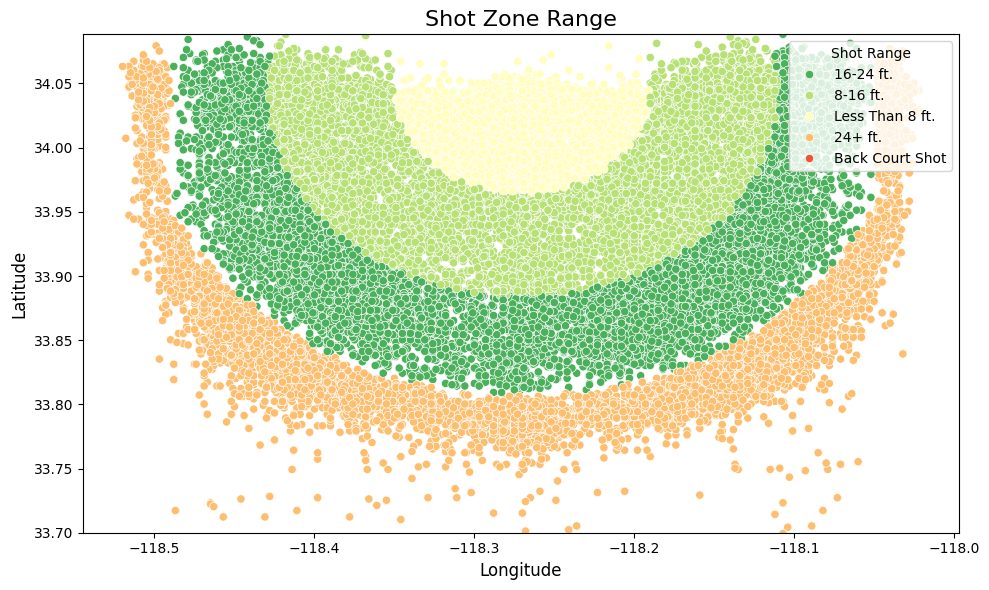

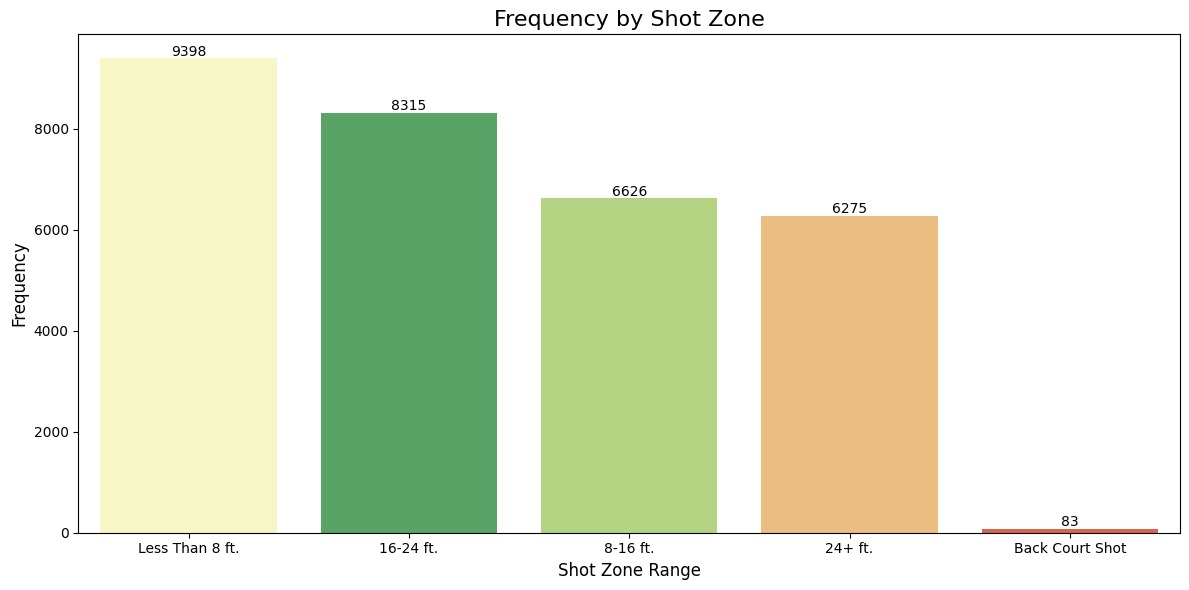

<ipython-input-6-34cd11196271>:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_range = shots.groupby('shot_zone_range').apply(lambda x: x.assign(Accuracy=x['shot_made_flag'].mean())).reset_index(drop=True)


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

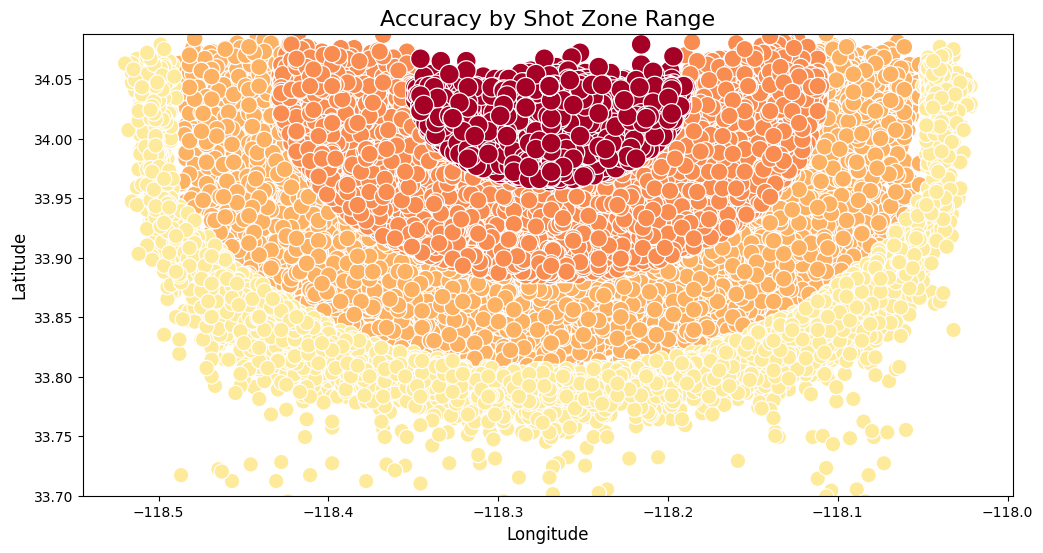

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming shots is a pandas DataFrame
shots = pd.read_csv('/content/data.csv')

# Consistent color palette
color_palette = 'RdYlGn_r'  # Color theme

# 1. Plot: Shot Zone Range (Scatter Plot)
plt.figure(figsize=(10, 6))  # Set figure width
scatter = sns.scatterplot(x='lon', y='lat', hue='shot_zone_range', data=shots, palette=color_palette)
plt.title("Shot Zone Range", fontsize=16)
plt.ylim([33.7, 34.0883])
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add the legend
legend = plt.legend(title='Shot Zone Range', loc='upper right')
legend.set_title('Shot Range')

# Adjust tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

# 2. Plot: Frequency by Shot Zone Range (Bar Plot)
plt.figure(figsize=(12, 6))  # Set figure width
ax = sns.countplot(x='shot_zone_range', data=shots, hue='shot_zone_range', palette=color_palette,
                   order=shots['shot_zone_range'].value_counts().index, dodge=False)

plt.ylabel("Frequency", fontsize=12)
plt.xlabel('Shot Zone Range', fontsize=12)
plt.title("Frequency by Shot Zone", fontsize=16)

# Display actual numbers above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, int(height), ha="center", fontsize=10)

# Adjust tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

# 3. Plot: Accuracy by Shot Zone Range (Scatter Plot with Colorbar)
# Calculate accuracy
accuracy_by_range = shots.groupby('shot_zone_range').apply(lambda x: x.assign(Accuracy=x['shot_made_flag'].mean())).reset_index(drop=True)

# Create figure
plt.figure(figsize=(12, 6))

# Plot scatter plot
scatter = sns.scatterplot(x='lon', y='lat', hue='Accuracy', data=accuracy_by_range, palette=color_palette,
                          size='Accuracy', sizes=(20, 200), legend=False)

# Title and labels
plt.title("Accuracy by Shot Zone Range", fontsize=16)
plt.ylim([33.7, 34.0883])
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Create a colorbar for accuracy
norm = Normalize(vmin=accuracy_by_range['Accuracy'].min(), vmax=accuracy_by_range['Accuracy'].max())
sm = ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])

# Add the colorbar to the plot
cbar = plt.colorbar(sm)
cbar.set_label('Accuracy', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


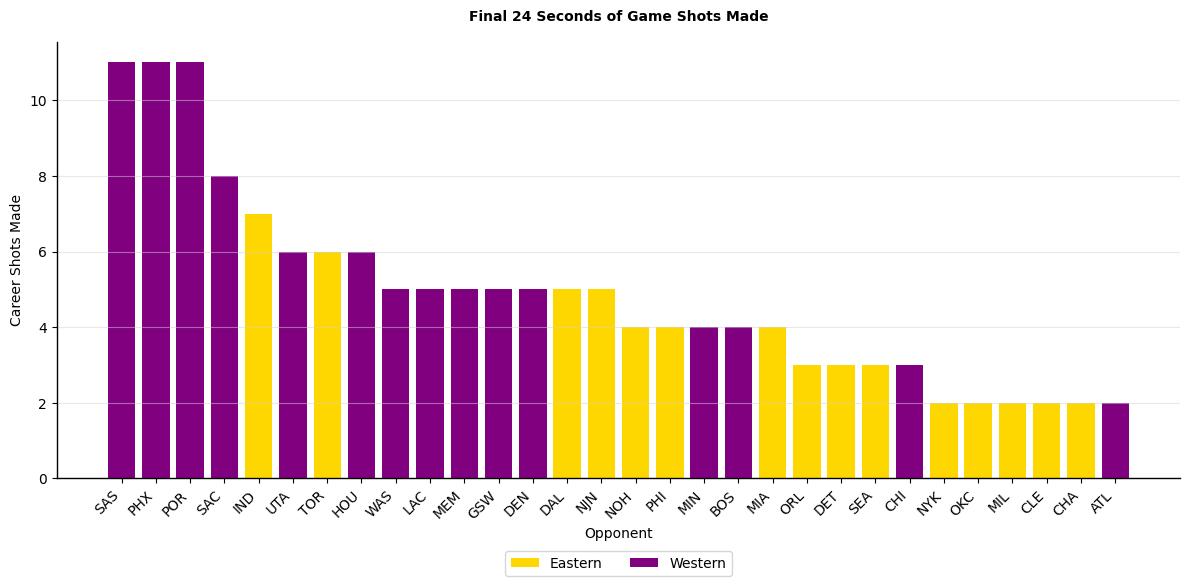

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter and calculate shots made
final_shots = shots[
    (shots['seconds_remaining'] <= 24) &
    (shots['period'] >= 4) &
    (shots['minutes_remaining'] == 0) &
    (shots['opponent'] != 'VAN')
]
shots_by_opponent = final_shots.groupby('opponent')['shot_made_flag'].sum().reset_index()
shots_by_opponent = shots_by_opponent.sort_values('shot_made_flag', ascending=False)

# Add conference data
conferences = {
    'opponent': shots_by_opponent['opponent'],
    'Conference': ['Western', 'Western', 'Western', 'Western', 'Eastern',
                  'Western', 'Eastern', 'Western', 'Western', 'Western',
                  'Western', 'Western', 'Western', 'Eastern', 'Eastern',
                  'Eastern', 'Eastern', 'Western', 'Western', 'Eastern',
                  'Eastern', 'Eastern', 'Eastern', 'Western', 'Eastern',
                  'Eastern', 'Eastern', 'Eastern', 'Eastern', 'Western']
}
plot_data = shots_by_opponent.merge(pd.DataFrame(conferences), on='opponent')

plt.figure(figsize=(12, 6))

# Create bar plot
colors = ['gold' if conf == 'Eastern' else 'purple' for conf in plot_data['Conference']]
plt.bar(range(len(plot_data)), plot_data['shot_made_flag'], color=colors)

# Customize plot
plt.title("Final 24 Seconds of Game Shots Made", fontsize=10, fontfamily='sans-serif',
         fontweight='bold', pad=15)
plt.xlabel("Opponent", fontsize=10)
plt.ylabel("Career Shots Made", fontsize=10)

# Set x-axis labels
plt.xticks(range(len(plot_data)), plot_data['opponent'], rotation=45, ha='right', fontsize=10)

# Grid and spines
plt.grid(True, axis='y', color='#d3d3d3', linestyle='-', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='gold', label='Eastern'),
                  Patch(facecolor='purple', label='Western')]
plt.legend(handles=legend_elements, loc='upper center',
          bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

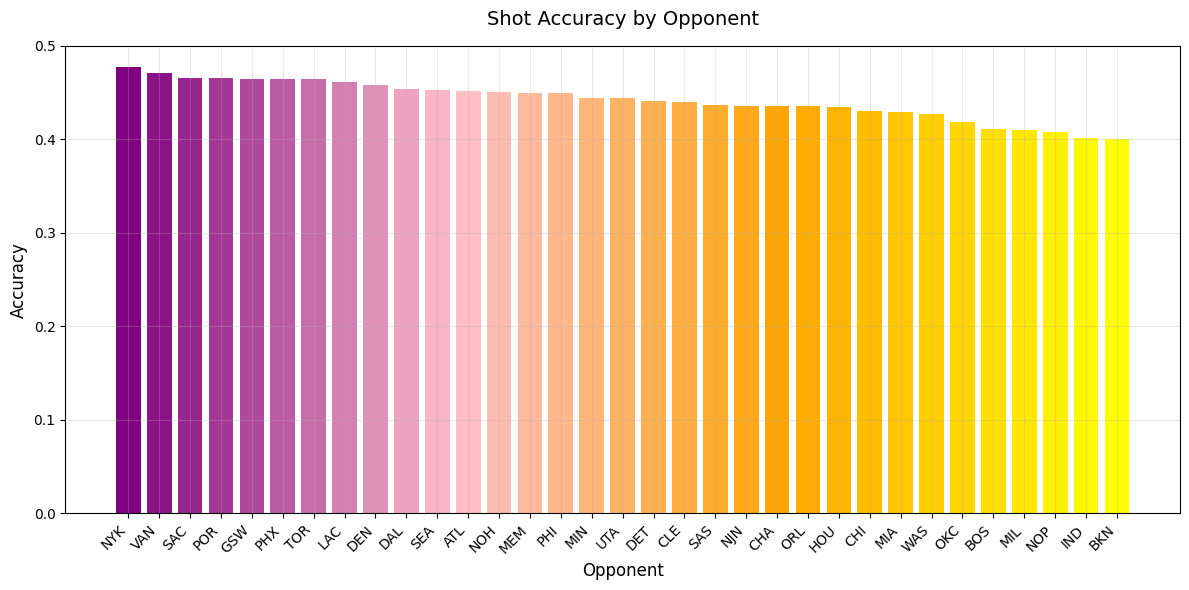

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import numpy as np

# Calculate accuracy by opponent
accuracy_by_opponent = shots.groupby('opponent')['shot_made_flag'].mean().reset_index()
plot_data = accuracy_by_opponent.sort_values('shot_made_flag', ascending=False)

plt.figure(figsize=(12, 6))

# Create custom colormap from purple to yellow
colors = mcolors.LinearSegmentedColormap.from_list("", ['purple', 'pink', 'orange', 'yellow'])
normalized_values = (np.arange(len(plot_data))) / (len(plot_data) - 1)
bar_colors = colors(normalized_values)

plt.bar(range(len(plot_data)), plot_data['shot_made_flag'], color=bar_colors)

plt.title("Shot Accuracy by Opponent", pad=15, fontsize=14)
plt.xlabel("Opponent", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 0.5)

plt.xticks(range(len(plot_data)), plot_data['opponent'], rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

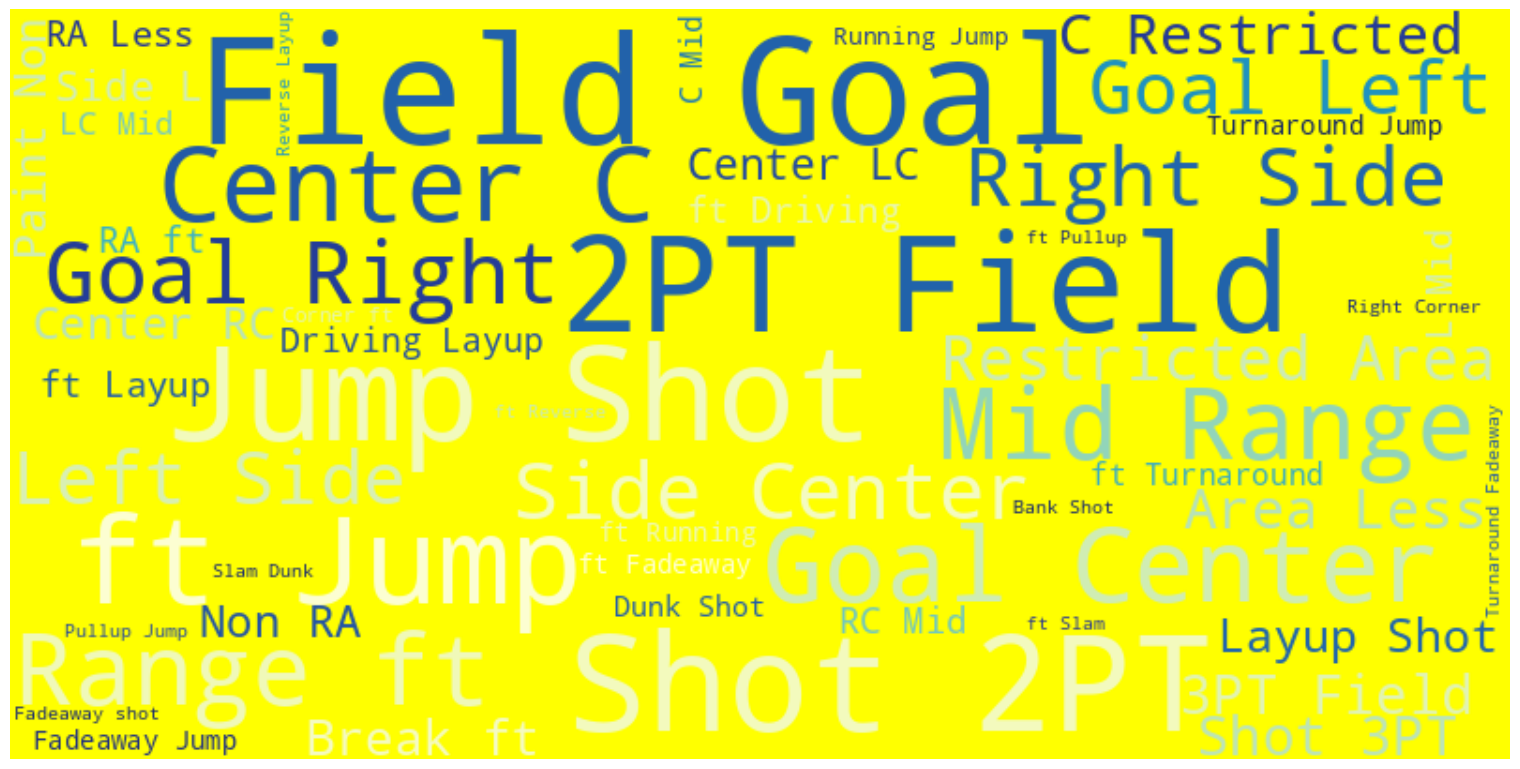

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Calculate accuracy by different categories
accuracy_by_zone = shots.groupby('shot_zone_basic')['shot_made_flag'].mean()
accuracy_by_type = shots.groupby('shot_type')['shot_made_flag'].mean()
accuracy_by_range = shots.groupby('shot_zone_range')['shot_made_flag'].mean()

# Create accuracy text
accuracy_text = ' '.join([
    f"{zone} {acc:.3f}" for zone, acc in accuracy_by_zone.items()
]) + ' ' + ' '.join([
    f"{type_} {acc:.3f}" for type_, acc in accuracy_by_type.items()
]) + ' ' + ' '.join([
    f"{range_} {acc:.3f}" for range_, acc in accuracy_by_range.items()
])

# Combine all text
text = ' '.join(shots['action_type'].astype(str) + ' ' +
               shots['shot_type'].astype(str) + ' ' +
               shots['shot_zone_area'].astype(str) + ' ' +
               shots['shot_zone_basic'].astype(str) + ' ' +
               shots['shot_zone_range'].astype(str)) + ' ' + accuracy_text

# Create and generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='yellow',
    colormap='YlGnBu',
    max_words=150,
    max_font_size=80,
    min_font_size=10,
    random_state=42
).generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

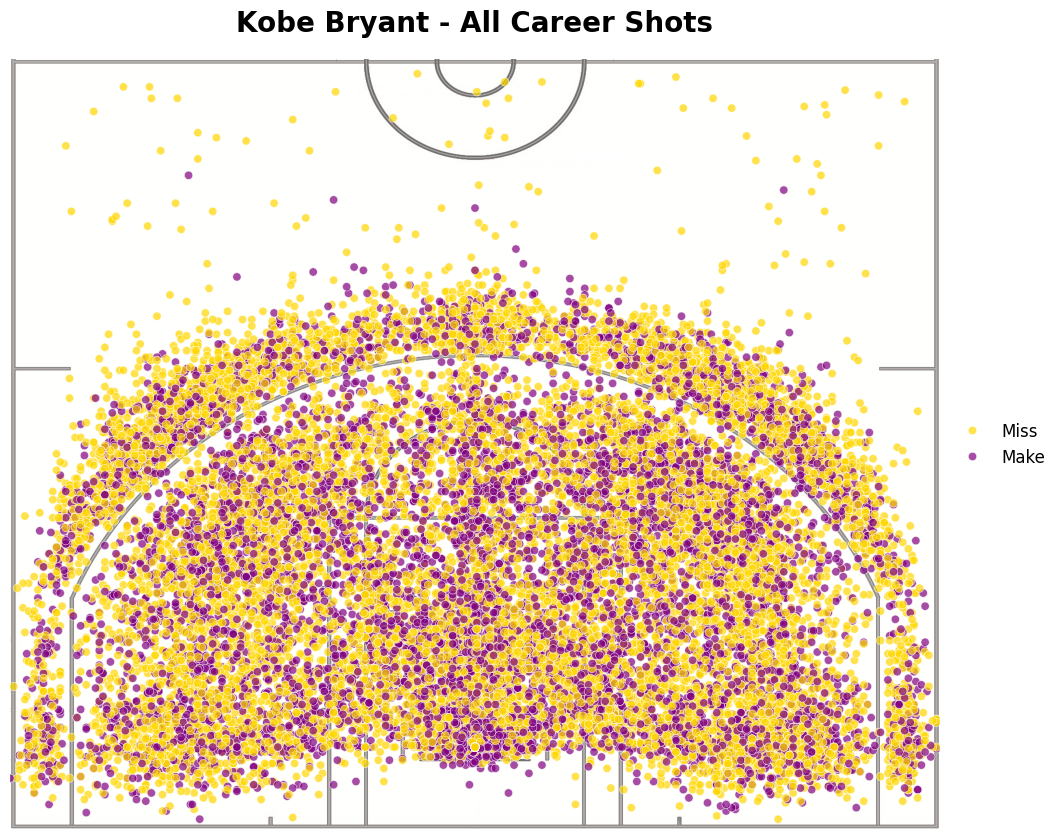

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Read data
kobe = pd.read_csv('/content/data.csv')

# Clean data
shots = kobe.dropna().copy()
shots['point_type'] = shots['shot_type'].apply(lambda x: 2 if x == '2PT Field Goal' else 3)
shots['game_date'] = pd.to_datetime(shots['game_date'], format='%Y-%m-%d')

# Map shot_made_flag to labels
shots['shot_made_flag_label'] = shots['shot_made_flag'].map({1: 'Make', 0: 'Miss'})

# Load your uploaded NBA court image
court_img_path = '/content/nba_court_dimensions.jpg'  # Replace with your uploaded image path
court_img = Image.open(court_img_path)

# Plot all shots with larger size and legend on the right
plt.figure(figsize=(12, 10))  # Larger figure size
plt.imshow(court_img, extent=(-250, 250, -50, 420), aspect='auto', alpha=0.6)

# Define custom color palette
palette = {'Make': 'purple', 'Miss': 'gold'}

# Scatter plot
sns.scatterplot(
    data=shots, x='loc_x', y='loc_y',
    hue='shot_made_flag_label', palette=palette, alpha=0.7, legend='full'
)

# Move legend to the right
plt.legend(
    title=None, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=12
)

# Add plot styling
plt.xlim(-250, 250)
plt.ylim(-50, 420)
plt.axis('off')  # Remove axis
plt.title("Kobe Bryant - All Career Shots", fontsize=20, fontweight='bold', pad=20)
plt.show()

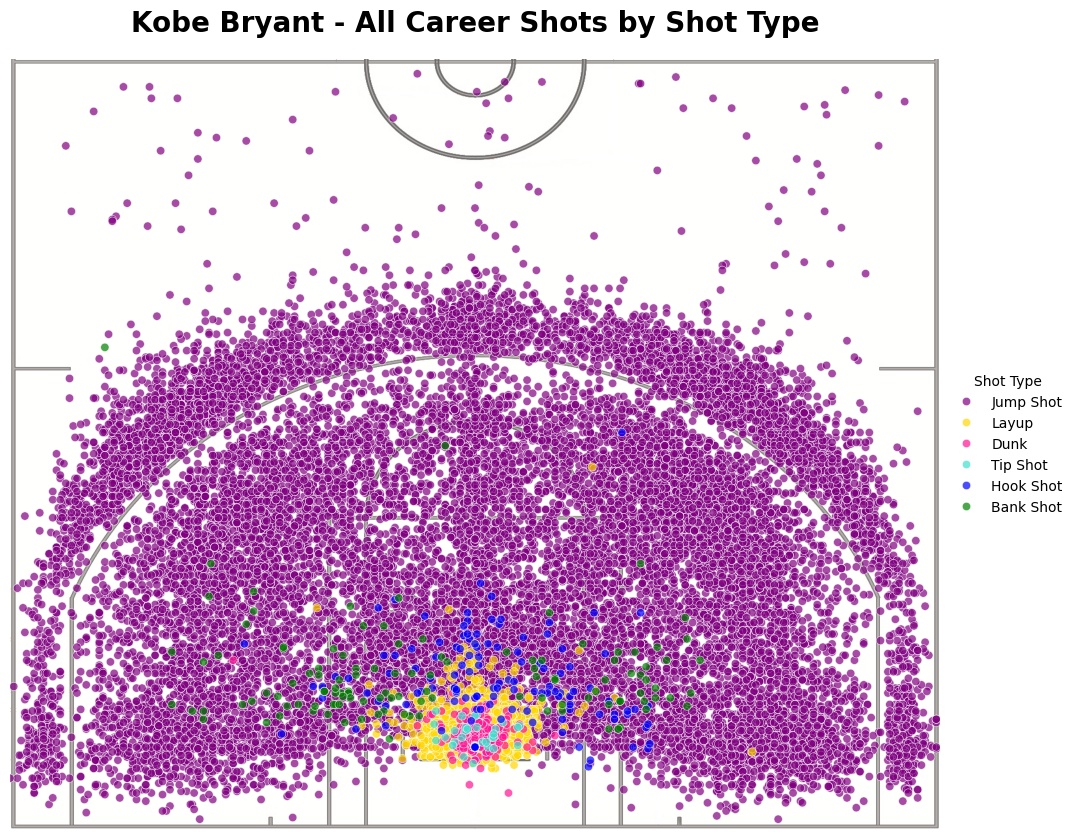

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Read data
kobe = pd.read_csv('/content/data.csv')

# Clean data
shots = kobe.dropna().copy()

# Add a count column grouped by combined_shot_type
shots['shot_type_count'] = shots.groupby('combined_shot_type')['combined_shot_type'].transform('count')

# Load your uploaded NBA court image
court_img_path = '/content/nba_court_dimensions.jpg'  # Replace with your uploaded image path
court_img = Image.open(court_img_path)

# Sort shots by descending shot_type_count for plotting
shots = shots.sort_values(by='shot_type_count', ascending=False)

# Plot all shots with larger size and grouped by shot type
plt.figure(figsize=(12, 10))  # Larger figure size
plt.imshow(court_img, extent=(-250, 250, -50, 420), aspect='auto', alpha=0.6)

# Define a custom color palette for the shot types
custom_palette = {
    'Bank Shot': 'green',
    'Dunk': 'deeppink',
    'Hook Shot': 'blue',
    'Jump Shot': 'purple',
    'Layup': 'gold',
    'Tip Shot': 'turquoise'
}

# Plot the grouped shots with different colors
scatter = sns.scatterplot(
    data=shots,
    x='loc_x',
    y='loc_y',
    hue='combined_shot_type',
    palette=custom_palette,
    alpha=0.7
)

# Add plot styling
plt.xlim(-250, 250)
plt.ylim(-50, 420)
plt.axis('off')  # Remove axis
plt.title("Kobe Bryant - All Career Shots by Shot Type", fontsize=20, fontweight='bold', pad=20)

# Keep shot types as legend with adjusted position and style
plt.legend(
    title="Shot Type", loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=10
)

plt.show()

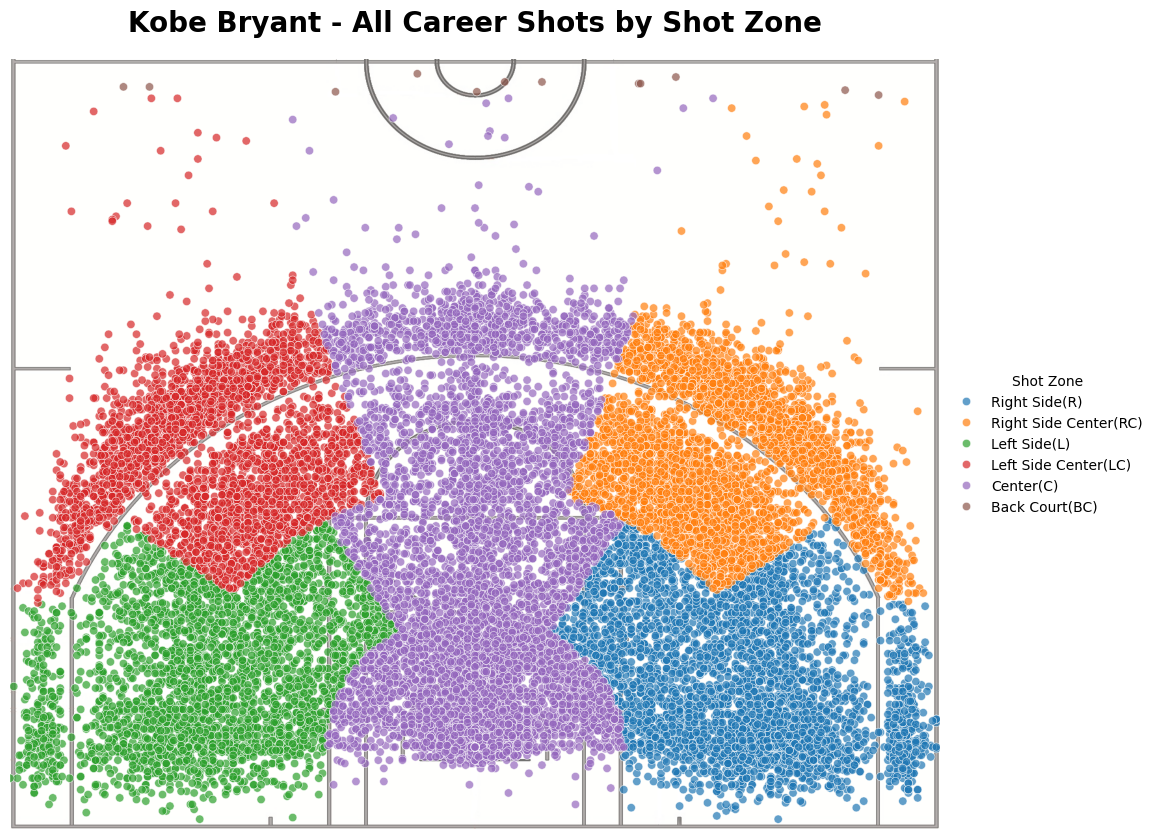

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Read data
kobe = pd.read_csv('/content/data.csv')

# Clean data
shots = kobe.dropna().copy()

# Add a count column grouped by shot_zone_area
shots['shot_zone_area_count'] = shots.groupby('shot_zone_area')['shot_zone_area'].transform('count')

# Load your uploaded NBA court image
court_img_path = '/content/nba_court_dimensions.jpg'  # Replace with your uploaded image path
court_img = Image.open(court_img_path)

# Sort shots by descending shot_zone_area_count for plotting
shots = shots.sort_values(by='shot_zone_area', ascending=False)

# Plot all shots with larger size and grouped by shot zone area
plt.figure(figsize=(12, 10))  # Larger figure size
plt.imshow(court_img, extent=(-250, 250, -50, 420), aspect='auto', alpha=0.6)

# Plot the grouped shots with different colors
scatter = sns.scatterplot(
    data=shots,
    x='loc_x',
    y='loc_y',
    hue='shot_zone_area',
    alpha=0.7,
    legend='full'
)

# Add plot styling
plt.xlim(-250, 250)
plt.ylim(-50, 420)
plt.axis('off')  # Remove axis
plt.title("Kobe Bryant - All Career Shots by Shot Zone", fontsize=20, fontweight='bold', pad=20)

# Keep shot zone area as legend with adjusted position and style
plt.legend(
    title="Shot Zone", loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=10
)

plt.show()


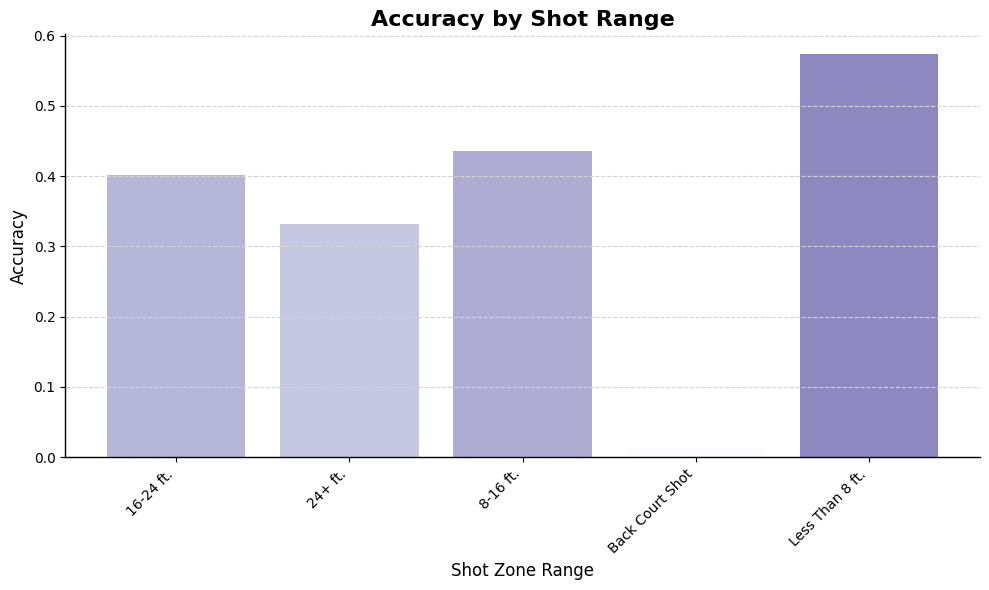

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
kobe = pd.read_csv('/content/data.csv')

# Clean data
shots = kobe.dropna().copy()

# Group by shot_zone_range and calculate accuracy
accuracy_by_range = shots.groupby('shot_zone_range', as_index=False).agg(Accuracy=('shot_made_flag', 'mean'))

# Sort by shot_zone_range for better visualization
accuracy_by_range = accuracy_by_range.sort_values(by='shot_zone_range')

# Plot Accuracy by Shot Range
plt.figure(figsize=(10, 6))  # Adjust figure size

# Create bar plot with color gradient
bar = plt.bar(
    x=accuracy_by_range['shot_zone_range'],
    height=accuracy_by_range['Accuracy'],
    color=plt.cm.Purples(accuracy_by_range['Accuracy'])
)

# Add title and labels
plt.title("Accuracy by Shot Range", fontsize=16, fontweight='bold')
plt.xlabel("Shot Zone Range", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Remove gridlines and customize axes
plt.grid(axis='y', linestyle='--', color='#d3d3d3')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)

# Show plot
plt.tight_layout()
plt.show()